# Analise dos dados Airbnb

### Importação das bibliotécas

In [247]:
import numpy as np # manipulação e análise de dados.
import pandas as pd # funções matemáticas
import matplotlib.pyplot as plt # gráficos e visualizações de dados
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
%matplotlib inline

from math import floor

### Importando bases com pandas

In [248]:
# temos 3 bases para analisar.
# Dados Seatle


df_calendar = pd.read_csv('seattle/calendar.csv')
df_listing = pd.read_csv('seattle/listings.csv')
df_reviews = pd.read_csv('seattle/reviews.csv')

#### Calendar

In [251]:
## Proporção de missing

df_calendar[df_calendar.price.isnull()].price.shape[0]/df_calendar.shape[0]

0.32938998399793334

#### listing

In [252]:
df_listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [253]:
#formatando as variáveis com preço
df_listing['price'] = df_listing['price'].apply(lambda x: (x.replace("$","").replace(",","")))
df_listing['extra_people']=df_listing['extra_people'].astype(str).apply(lambda x: (x.replace("$","").replace(",","")))
df_listing['cleaning_fee']=df_listing['cleaning_fee'].fillna(0).astype(str).apply(lambda x: (x.replace("$","").replace(",","")))
df_listing['security_deposit']=df_listing['security_deposit'].fillna(0).astype(str).apply(lambda x: (x.replace("$","").replace(",","")))
lista_review=['review_scores_value','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location']
for i in lista_review:
    df_listing[i]=(df_listing[i].astype(str).apply(lambda x: (x.replace("%","").replace(".","")))).astype(float)
    
df_listing['host_response_rate']=df_listing['host_response_rate'].fillna(0).astype(str).apply(lambda x: (x.replace("%","").replace(",","")))
# acrescentando a tabela ano
df_listing['ano'] = pd.DatetimeIndex(df_listing['host_since']).year

## Análise de Vizinhos 

### Crescimento dos pontos turísticos x Ano

In [254]:
base_vizinho= df_listing[['ano','neighbourhood_group_cleansed','id','neighbourhood','property_type']]
base_vizinho.head()

,ano,neighbourhood_group_cleansed,id,neighbourhood,property_type
0,2011.0,Queen Anne,241032,Queen Anne,Apartment
1,2013.0,Queen Anne,953595,Queen Anne,Apartment
2,2014.0,Queen Anne,3308979,Queen Anne,House
3,2013.0,Queen Anne,7421966,Queen Anne,Apartment
4,2011.0,Queen Anne,278830,Queen Anne,House


In [255]:
lista_vizinho = list(base_vizinho.neighbourhood_group_cleansed.value_counts().reset_index()['index'].iloc[:10])

base_vizinho2= pd.DataFrame()
for i in lista_vizinho:
    print(i)
    base_vizinho2= pd.concat([base_vizinho[base_vizinho['neighbourhood_group_cleansed']==i],base_vizinho2])


Other neighborhoods
Capitol Hill
Downtown
Central Area
Queen Anne
Ballard
West Seattle
Rainier Valley
University District
Beacon Hill


In [256]:
pd.DataFrame(base_vizinho2.neighbourhood_group_cleansed.value_counts())

,neighbourhood_group_cleansed
Other neighborhoods,794
Capitol Hill,567
Downtown,530
Central Area,369
Queen Anne,295
Ballard,230
West Seattle,203
Rainier Valley,159
University District,122
Beacon Hill,118


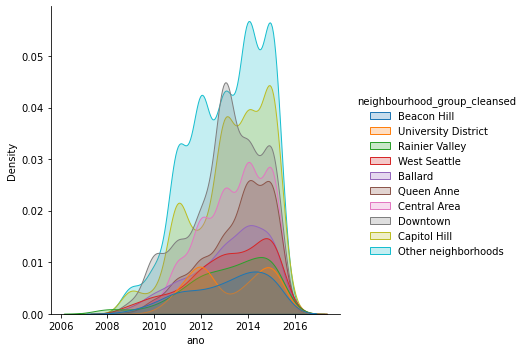

In [257]:
sns.displot(base_vizinho2, x="ano", hue="neighbourhood_group_cleansed", kind="kde", fill=True)

<Figure size 1440x576 with 0 Axes>

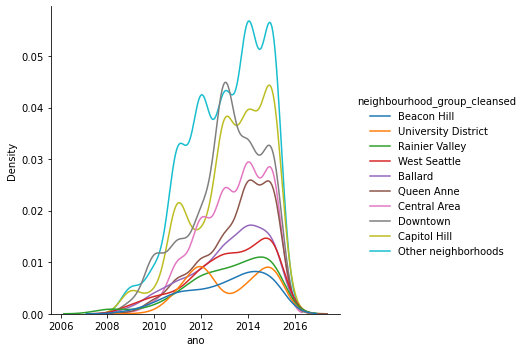

In [258]:
plt.figure(figsize=(20,8))

sns.displot(base_vizinho2, x="ano", hue="neighbourhood_group_cleansed", kind="kde")
#sns.displot(base_vizinho, x="ano", hue="neighbourhood_group_cleansed", multiple="stack" )#,element="step")

### Quais são os tipos de propriedades por região

In [275]:
lista_propriedade = list(base_vizinho2.property_type.value_counts().reset_index()['index'].iloc[:7])

base_propriedade= pd.DataFrame()
for i in lista_propriedade:
#    print(i)
    base_propriedade= pd.concat([base_vizinho2[base_vizinho2['property_type']==i],base_propriedade])


In [276]:
base_propriedade2 = base_propriedade.groupby(['property_type', 'neighbourhood_group_cleansed']
                         ).size().reset_index().rename(columns={0:'size'}).sort_values(by='size',ascending= False)
#base_propriedade2 = base_propriedade2.head(10)
base_propriedade2.iloc[:10]

,property_type,neighbourhood_group_cleansed,size
31,House,Other neighborhoods,496
4,Apartment,Downtown,469
2,Apartment,Capitol Hill,356
5,Apartment,Other neighborhoods,235
29,House,Central Area,216
6,Apartment,Queen Anne,169
28,House,Capitol Hill,168
26,House,Ballard,146
35,House,West Seattle,141
33,House,Rainier Valley,114


### Review

In [282]:
score_agrupado =df_listing.groupby('neighbourhood_group_cleansed').mean()[['review_scores_rating','review_scores_value',
                    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                    'review_scores_location']].round(1).T



In [309]:
review = df_listing[['id','review_scores_rating','review_scores_value','review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                    'review_scores_location']]

In [316]:
review.index = review.id
review = review.drop(columns='id')

In [347]:
plt.figure(figsize = (18,15))
media_scores = pd.DataFrame(review.T.mean()).rename(columns={0:'media_scores'}).sort_values(by='media_scores',
                                                                             ascending = True).round(1)
media_scores =media_scores.merge(df_listing,how='inner', on='id')

<Figure size 1296x1080 with 0 Axes>

Text(0, 0.5, 'scores communication')

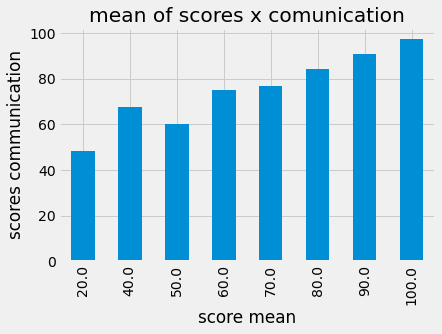

In [386]:
plt.style.use('fivethirtyeight')
g = media_scores.groupby('review_scores_communication')
media_comunication=g.mean()
plt.xlabel("")
media_comunication['media_scores'].plot.bar();

plt.title("mean of scores x comunication")
plt.xlabel("score mean")
plt.ylabel("scores communication")